In [1]:
%load_ext autoreload
%autoreload 2

#Utils
import os
from pathlib import Path
import time

#Eda
import numpy as np
import pandas as pd
import statsmodels

#Viz
import matplotlib.pyplot as plt
import seaborn as sns

#Modules
from real_estate.params import *
from real_estate.interface.main import preprocessing, training
from real_estate.ml_logic.data import clean_data, combined_temporal_features_df, merged_dfs, real_estate
from real_estate.ml_logic.preprocessor import preprocess_features


# Data Extraction

In [2]:
data_path = os.path.join(LOCAL_DATA_PATH)
data_path

'/home/steph-grigors/code/steph-grigors/real_estate_dataset/data'

In [3]:
file_names = os.listdir(data_path)
file_names

['indice_reference_loyers.csv',
 'transactions_sample.csv',
 'loyers.csv',
 'foyers_fiscaux.csv',
 'taux_interet.csv',
 'flux_nouveaux_emprunts.csv',
 'transactions.npz',
 'full_transactions_dataset',
 'parc_immobilier.csv',
 'processed_chunks',
 'taux_endettement.csv']

In [4]:
for file_to_remove in ['transactions.npz', 'full_transactions_dataset', 'processed_chunks']:
    file_names.remove(file_to_remove)

file_names

['indice_reference_loyers.csv',
 'transactions_sample.csv',
 'loyers.csv',
 'foyers_fiscaux.csv',
 'taux_interet.csv',
 'flux_nouveaux_emprunts.csv',
 'parc_immobilier.csv',
 'taux_endettement.csv']

In [5]:
suffix = '_df'
clean_file_names = [file.replace('.csv', suffix) for file in file_names]
clean_file_names

['indice_reference_loyers_df',
 'transactions_sample_df',
 'loyers_df',
 'foyers_fiscaux_df',
 'taux_interet_df',
 'flux_nouveaux_emprunts_df',
 'parc_immobilier_df',
 'taux_endettement_df']

In [6]:
dict(zip(clean_file_names, file_names)).items()

dict_items([('indice_reference_loyers_df', 'indice_reference_loyers.csv'), ('transactions_sample_df', 'transactions_sample.csv'), ('loyers_df', 'loyers.csv'), ('foyers_fiscaux_df', 'foyers_fiscaux.csv'), ('taux_interet_df', 'taux_interet.csv'), ('flux_nouveaux_emprunts_df', 'flux_nouveaux_emprunts.csv'), ('parc_immobilier_df', 'parc_immobilier.csv'), ('taux_endettement_df', 'taux_endettement.csv')])

In [7]:
transactions_sample_df = real_estate().get_data()['transactions_sample_df'].copy()
transactions_sample_df.head(5)

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,n_pieces,surface_habitable,id_parcelle_cadastre,latitude,longitude,surface_dependances,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature
0,10160888,2015-07-22,222500.0,63,247,MUROL,63790,5148 COMBE,Maison,False,4,123,63247000ZO0165,45.572973,2.949976,{},{},{},{2387},{}
1,10319766,2024-06-18,218640.0,73,15,LES ALLUES,73550,45 RUE DU GRAND COEUR,Appartement,False,1,23,73015000AB0347,45.398740,6.567602,{0},{},{},{},{}
2,11545562,2020-07-23,254950.0,77,316,MORET-LOING-ET-ORVANNE,77250,1 RUE DE LA CROIX BLANCHE,Maison,False,6,124,773161700B0305,48.333762,2.780830,{},{},{},{815},{}
3,13891173,2022-10-03,380000.0,94,81,VITRY-SUR-SEINE,94400,11 VOIE VICTOR MASSE,Maison,False,3,93,94081000AK0189,48.796988,2.375558,{},{},{},{208},{}
4,11794772,2018-07-12,258000.0,77,284,MEAUX,77100,14 RUE PIERRE BONTEMPS,Maison,False,5,96,77284000AW0090,48.948816,2.891734,{},{},{},{},{}


In [11]:
cleaned_dataframes_dictionnary = clean_data()

In [12]:
cleaned_dataframes_dictionnary['transactions_sample_df']

,date_transaction,prix,departement,id_ville,ville,type_batiment,n_pieces,surface_habitable,surface_terrains_sols
0,2015-07-22,222500.0,63,247,MUROL,Maison,4,123,Large outdoor space
1,2024-06-18,218640.0,73,15,LES ALLUES,Appartement,1,23,No garden
2,2020-07-23,254950.0,77,316,MORET-LOING-ET-ORVANNE,Maison,6,124,Average outdoor space
3,2022-10-03,380000.0,94,81,VITRY-SUR-SEINE,Maison,3,93,Average outdoor space
4,2018-07-12,258000.0,77,284,MEAUX,Maison,5,96,No garden
...,...,...,...,...,...,...,...,...,...
95,2022-11-23,152000.0,21,292,GENLIS,Maison,4,79,Average outdoor space
96,2023-07-04,290000.0,69,386,LYON 6EME,Appartement,2,43,No garden
97,2023-01-30,180000.0,56,121,LORIENT,Maison,4,65,Average outdoor space
98,2017-03-24,356100.0,38,276,NIVOLAS-VERMELLE,Maison,8,185,Large outdoor space


In [13]:
clean_transactions_df = cleaned_dataframes_dictionnary['transactions_sample_df']
clean_new_mortgages_df = cleaned_dataframes_dictionnary['flux_nouveaux_emprunts_df']
clean_tax_households_df = cleaned_dataframes_dictionnary['foyers_fiscaux_df']
clean_interest_rates_df = cleaned_dataframes_dictionnary['taux_interet_df']
clean_debt_ratio_df = cleaned_dataframes_dictionnary['taux_endettement_df']

In [14]:
temporal_features_df = combined_temporal_features_df(clean_new_mortgages_df,
                                                         clean_interest_rates_df,
                                                         clean_debt_ratio_df)

temporal_features_df

,New_mortgages,Debt_ratio,Interest_rates,year_month_numeric
2014-12-01,13207000000,89.381667,2.55,24180
2015-01-01,12247000000,89.520000,2.49,24181
2015-02-01,12924000000,89.634167,2.42,24182
2015-03-01,15864000000,89.748333,2.34,24183
2015-04-01,16895000000,89.862500,2.24,24184
...,...,...,...,...
2024-03-01,9751000000,102.840000,3.94,24291
2024-04-01,10817000000,102.840000,3.89,24292
2024-05-01,10709000000,102.840000,3.83,24293
2024-06-01,13017000000,102.840000,3.70,24294


In [15]:
clean_transactions_df

,date_transaction,prix,departement,id_ville,ville,type_batiment,n_pieces,surface_habitable,surface_terrains_sols
0,2015-07-22,222500.0,63,247,MUROL,Maison,4,123,Large outdoor space
1,2024-06-18,218640.0,73,15,LES ALLUES,Appartement,1,23,No garden
2,2020-07-23,254950.0,77,316,MORET-LOING-ET-ORVANNE,Maison,6,124,Average outdoor space
3,2022-10-03,380000.0,94,81,VITRY-SUR-SEINE,Maison,3,93,Average outdoor space
4,2018-07-12,258000.0,77,284,MEAUX,Maison,5,96,No garden
...,...,...,...,...,...,...,...,...,...
95,2022-11-23,152000.0,21,292,GENLIS,Maison,4,79,Average outdoor space
96,2023-07-04,290000.0,69,386,LYON 6EME,Appartement,2,43,No garden
97,2023-01-30,180000.0,56,121,LORIENT,Maison,4,65,Average outdoor space
98,2017-03-24,356100.0,38,276,NIVOLAS-VERMELLE,Maison,8,185,Large outdoor space


In [16]:
from real_estate.utils import create_city_mapping

city_mapping = create_city_mapping(clean_transactions_df)

In [17]:
clean_transactions_df_processed = preprocess_features(clean_transactions_df)
clean_transactions_df_processed


Preprocessing features from raw transactions dataframe...


,n_rooms,year_month_numeric,month_sin,month_cos,departement,unique_city_id,no_garden,small_outdoor_space,average_outdoor_space,large_outdoor_space,building_type,price/m²,living_area
0,0.428571,24187.0,-0.5,-0.866025,63,"(63, 247)",1.0,0.0,1.0,0.0,0.0,1808.943089,1.259658
1,0.0,24294.0,0.0,-1.0,73,"(73, 15)",0.0,0.0,0.0,1.0,0.0,9506.086957,-1.509513
2,0.714286,24247.0,-0.5,-0.866025,77,"(77, 316)",1.0,1.0,0.0,0.0,0.0,2056.048387,1.28735
3,0.285714,24274.0,-0.866025,0.5,94,"(94, 81)",1.0,1.0,0.0,0.0,0.0,4086.021505,0.428907
4,0.571429,24223.0,-0.5,-0.866025,77,"(77, 284)",1.0,0.0,0.0,1.0,0.0,2687.5,0.511982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.428571,24275.0,-0.5,0.866025,21,"(21, 292)",1.0,1.0,0.0,0.0,0.0,1924.050633,0.041223
84,0.142857,24283.0,-0.5,-0.866025,69,"(69, 386)",0.0,0.0,0.0,1.0,0.0,6744.186047,-0.955679
85,0.428571,24277.0,0.5,0.866025,56,"(56, 121)",1.0,1.0,0.0,0.0,0.0,2769.230769,-0.346461
86,1.0,24207.0,1.0,0.0,38,"(38, 276)",1.0,0.0,1.0,0.0,0.0,1924.864865,2.976545


In [44]:
X, y = preprocessing()


Preprocessing features from raw transactions dataframe...
✅ X_processed, with shape (68, 18)
✅ preprocess() done 



In [45]:
# Convert numeric columns (which should be float or int) to appropriate types
numeric_columns = [
    'n_tax_households', 'average_tax_income', 'new_mortgages',
    'debt_ratio', 'interest_rates', 'n_rooms', 'year_month_numeric',
    'month_sin', 'month_cos', 'living_area'
]

# You can use pd.to_numeric to convert these columns
X[numeric_columns] = X[numeric_columns].apply(pd.to_numeric, errors='coerce')

# For categorical columns (assuming they should remain as 'category' or 'object')
categorical_columns = ['departement', 'unique_city_id',
                       'no_garden',
    'small_outdoor_space', 'average_outdoor_space',
    'large_outdoor_space', 'building_type'
]

X[categorical_columns] = X[categorical_columns].astype('category')

In [46]:
y = y.apply(pd.to_numeric, errors='coerce')

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   n_tax_households       68 non-null     float64 
 1   average_tax_income     68 non-null     float64 
 2   new_mortgages          68 non-null     float64 
 3   debt_ratio             68 non-null     float64 
 4   interest_rates         68 non-null     float64 
 5   n_rooms                68 non-null     float64 
 6   year_month_numeric     68 non-null     float64 
 7   month_sin              68 non-null     float64 
 8   month_cos              68 non-null     float64 
 9   departement            68 non-null     category
 10  unique_city_id         68 non-null     category
 11  no_garden              68 non-null     category
 12  small_outdoor_space    68 non-null     category
 13  average_outdoor_space  68 non-null     category
 14  large_outdoor_space    68 non-null     categ

In [52]:
metrics = training(X, y)

[0]	train-rmse:2021.24348	validation-rmse:1838.59652
[1]	train-rmse:1972.52343	validation-rmse:1842.14267
[2]	train-rmse:1927.41546	validation-rmse:1839.77969
[3]	train-rmse:1860.50065	validation-rmse:1838.80159
[4]	train-rmse:1822.87646	validation-rmse:1838.69876
[5]	train-rmse:1757.01044	validation-rmse:1838.23517
[6]	train-rmse:1705.60800	validation-rmse:1834.19479
[7]	train-rmse:1651.42635	validation-rmse:1826.16676
[8]	train-rmse:1607.25573	validation-rmse:1825.66938
[9]	train-rmse:1551.92425	validation-rmse:1825.58937
[10]	train-rmse:1500.77915	validation-rmse:1826.70851


/home/steph-grigors/.pyenv/versions/estate/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning:

[23:56:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.




[11]	train-rmse:1455.84767	validation-rmse:1813.84206
[12]	train-rmse:1426.13338	validation-rmse:1815.28681
[13]	train-rmse:1385.17241	validation-rmse:1815.04357
[14]	train-rmse:1341.70581	validation-rmse:1788.60135
[15]	train-rmse:1301.64881	validation-rmse:1788.15994
[16]	train-rmse:1263.79680	validation-rmse:1789.91495
[17]	train-rmse:1226.86944	validation-rmse:1789.81164
[18]	train-rmse:1200.12388	validation-rmse:1763.99196
[19]	train-rmse:1165.66438	validation-rmse:1752.76134
[20]	train-rmse:1128.98058	validation-rmse:1730.21406
[21]	train-rmse:1095.93543	validation-rmse:1719.55558
[22]	train-rmse:1066.60257	validation-rmse:1719.55585
[23]	train-rmse:1034.17438	validation-rmse:1713.58141
[24]	train-rmse:1004.81071	validation-rmse:1713.68874
[25]	train-rmse:971.32153	validation-rmse:1703.73847
[26]	train-rmse:942.46260	validation-rmse:1694.12157
[27]	train-rmse:911.71503	validation-rmse:1684.96589
[28]	train-rmse:896.41593	validation-rmse:1684.94411
[29]	train-rmse:868.94755	valida

In [59]:
np.min(metrics['validation']['rmse'])

np.float64(1449.8490839432004)

In [40]:
split_date = X['year_month_numeric'].quantile(0.7)  # Use 80% for training, 20% for testing
X[X['year_month_numeric'] <= split_date]


,n_tax_households,average_tax_income,new_mortgages,debt_ratio,interest_rates,n_rooms,year_month_numeric,month_sin,month_cos,departement,unique_city_id,no_garden,small_outdoor_space,average_outdoor_space,large_outdoor_space,building_type,living_area
0,-0.501625,-0.685817,0.656388,0.042581,0.337838,0.428571,24187.0,-0.5,-0.866025,63,"(63, 247)",1.0,0.0,1.0,0.0,0.0,1.259658
2,-0.381922,0.546524,0.538831,0.9586,0.064189,0.714286,24247.0,-0.5,-0.866025,77,"(77, 316)",1.0,1.0,0.0,0.0,0.0,1.28735
4,0.053038,-0.838315,0.521989,0.599428,0.141892,0.571429,24223.0,-0.5,-0.866025,77,"(77, 284)",1.0,0.0,0.0,1.0,0.0,0.511982
6,-0.494065,-0.80174,0.627467,0.862373,0.037162,0.571429,24238.0,-0.866025,0.5,63,"(63, 80)",1.0,0.0,0.0,1.0,0.0,0.179681
7,-0.470472,-0.849015,0.439137,0.9655,0.070946,0.285714,24248.0,-0.866025,-0.5,2,"(2, 64)",1.0,0.0,0.0,0.0,1.0,-0.429536
8,-0.451963,1.147607,0.275689,0.566607,0.148649,0.571429,24221.0,0.5,-0.866025,44,"(44, 66)",1.0,1.0,0.0,0.0,0.0,0.678132
10,1.58883,-0.286259,0.333149,0.734444,0.135135,0.285714,24231.0,1.0,0.0,35,"(35, 238)",0.0,0.0,0.0,1.0,0.0,-0.152619
11,1.58883,-0.286259,0.691392,0.35078,0.162162,0.0,24209.0,0.5,-0.866025,35,"(35, 238)",0.0,0.0,0.0,1.0,0.0,-1.204904
12,-0.448608,0.814073,0.273945,0.533785,0.152027,0.285714,24219.0,1.0,0.0,91,"(91, 432)",0.0,0.0,0.0,1.0,0.0,-0.374153
13,-0.502815,-0.180215,0.712275,0.215018,0.168919,0.285714,24201.0,-1.0,-0.0,28,"(28, 232)",1.0,1.0,0.0,0.0,0.0,-0.65107


In [73]:
temporal_features_df

,New_mortgages,Debt_ratio,Interest_rates,year_month_numeric
2014-12-01,13207000000,89.381667,2.55,24180
2015-01-01,12247000000,89.520000,2.49,24181
2015-02-01,12924000000,89.634167,2.42,24182
2015-03-01,15864000000,89.748333,2.34,24183
2015-04-01,16895000000,89.862500,2.24,24184
...,...,...,...,...
2024-03-01,9751000000,102.840000,3.94,24291
2024-04-01,10817000000,102.840000,3.89,24292
2024-05-01,10709000000,102.840000,3.83,24293
2024-06-01,13017000000,102.840000,3.70,24294


In [255]:
clean_tax_households_df

,unique_city_id,n_foyers_fiscaux,revenu_fiscal_moyen
0,"(1, 202)",4130.555556,27104.757778
1,"(2, 64)",2188.888889,21168.797778
2,"(3, 310)",17815.777778,20923.501111
3,"(10, 51)",349.111111,34250.210000
4,"(13, 56)",29474.000000,24868.594444
...,...,...,...
61,"(92, 35)",17166.166667,47014.835000
62,"(94, 52)",19236.200000,49182.838000
63,"(94, 81)",55161.000000,21823.328333
64,"(95, 52)",5715.500000,23408.436667


In [74]:
merged_dfs(clean_transactions_df_processed,
                                  temporal_features_df,
                                  clean_tax_households_df,
                                  primary_keys = ('year_month_numeric', 'unique_city_id'))

,n_rooms,year_month_numeric,month_sin,month_cos,departement,unique_city_id,no_garden,small_outdoor_space,average_outdoor_space,large_outdoor_space,building_type,price/m²,living_area,New_mortgages,Debt_ratio,Interest_rates,n_foyers_fiscaux,revenu_fiscal_moyen
0,0.428571,24187.0,-0.5,-0.866025,63,"(63, 247)",1.0,0.0,1.0,0.0,0.0,1808.943089,1.259658,26142000000,90.205000,2.08,382.777778,22573.926667
1,0.0,24294.0,0.0,-1.0,73,"(73, 15)",0.0,0.0,0.0,1.0,0.0,9506.086957,-1.509513,13017000000,102.840000,3.70,1164.000000,35757.748889
2,0.714286,24247.0,-0.5,-0.866025,77,"(77, 316)",1.0,1.0,0.0,0.0,0.0,2056.048387,1.28735,23378000000,102.485000,1.27,7322.666667,33184.336667
3,0.285714,24274.0,-0.866025,0.5,94,"(94, 81)",1.0,1.0,0.0,0.0,0.0,4086.021505,0.428907,18201000000,102.840000,1.81,55161.000000,21823.328333
4,0.571429,24223.0,-0.5,-0.866025,77,"(77, 284)",1.0,0.0,0.0,1.0,0.0,2687.5,0.511982,22982000000,97.670000,1.50,32539.777778,21260.924444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.142857,24278.0,0.866025,0.5,14,"(14, 319)",1.0,0.0,0.0,1.0,0.0,5000.0,-0.983371,13981000000,102.840000,2.51,476.000000,29936.623333
64,0.428571,24275.0,-0.5,0.866025,21,"(21, 292)",1.0,1.0,0.0,0.0,0.0,1924.050633,0.041223,17968000000,102.840000,1.96,3009.333333,23422.250000
65,0.428571,24277.0,0.5,0.866025,56,"(56, 121)",1.0,1.0,0.0,0.0,0.0,2769.230769,-0.346461,15708000000,102.840000,2.31,36619.666667,21363.253333
66,1.0,24207.0,1.0,0.0,38,"(38, 276)",1.0,0.0,1.0,0.0,0.0,1924.864865,2.976545,34221000000,93.833333,1.48,1502.000000,28255.390000


# Tabular data (Transactions DataFrame)

In [404]:
transactions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_transaction              100 non-null    int64  
 1   date_transaction            100 non-null    object 
 2   prix                        100 non-null    float64
 3   departement                 100 non-null    int64  
 4   id_ville                    100 non-null    int64  
 5   ville                       100 non-null    object 
 6   code_postal                 100 non-null    int64  
 7   adresse                     100 non-null    object 
 8   type_batiment               100 non-null    object 
 9   vefa                        100 non-null    bool   
 10  n_pieces                    100 non-null    int64  
 11  surface_habitable           100 non-null    int64  
 12  id_parcelle_cadastre        100 non-null    object 
 13  latitude                    100 non-

## Slicing/filtering original DataFrame

In [115]:
transactions_sample_df = transactions_sample_df.drop(columns=['id_transaction', 'code_postal', 'adresse', 'vefa', 'id_parcelle_cadastre', 'surface_dependances', 'surface_terrains_nature', 'latitude', 'longitude'])

## Preprocessing outdoor areas (only keeping private properties)

In [116]:
# Drop the row when the outdoor area is either an industrial surface or an agricultural land plot. We are only keeping the private properties.

mask = (transactions_sample_df['surface_terrains_agricoles'] != '{}') | (transactions_sample_df['surface_locaux_industriels'] != '{}')
filtered_df = transactions_sample_df[~mask]
filtered_df = filtered_df.drop(columns=['surface_locaux_industriels', 'surface_terrains_agricoles'])
filtered_df.head(10)

,date_transaction,prix,departement,id_ville,ville,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id
0,2015-07-22,222500.0,63,247,MUROL,Maison,4,123,{2387},"(63, 247)"
1,2024-06-18,218640.0,73,15,LES ALLUES,Appartement,1,23,{},"(73, 15)"
2,2020-07-23,254950.0,77,316,MORET-LOING-ET-ORVANNE,Maison,6,124,{815},"(77, 316)"
3,2022-10-03,380000.0,94,81,VITRY-SUR-SEINE,Maison,3,93,{208},"(94, 81)"
4,2018-07-12,258000.0,77,284,MEAUX,Maison,5,96,{},"(77, 284)"
5,2023-09-27,141000.0,83,137,TOULON,Appartement,2,37,{},"(83, 137)"
6,2019-10-03,39990.0,63,80,CHAMPEIX,Maison,5,84,{},"(63, 80)"
7,2017-01-04,58000.0,85,49,CHAMPAGNE-LES-MARAIS,Maison,4,127,{363},"(85, 49)"
8,2020-08-27,66500.0,2,64,BELLEU,Maison,3,62,{198},"(2, 64)"
9,2023-03-28,69000.0,972,29,SCHOELCHER,Appartement,1,30,{},"(972, 29)"


In [119]:
# Cleaning Surface of outbuildings before processing
filtered_df['surface_terrains_sols'] = filtered_df.surface_terrains_sols.replace(r'[{}]', '', regex=True)

In [120]:
filtered_df[filtered_df['surface_terrains_sols'].astype(str).str.contains(',', na=False)]['surface_terrains_sols']

23      56,43,60
42    396,42,114
52      1050,413
59       735,506
66    79,80,1242
71        69,289
94        123,60
Name: surface_terrains_sols, dtype: object

In [121]:
# Preprocessing Surface of outbuildings
filtered_df['surface_terrains_sols'] = filtered_df['surface_terrains_sols'].apply(lambda x: 0 if ',' in str(x) else x)


In [122]:
# Surface of outbuildings to_numeric
filtered_df['surface_terrains_sols']  = pd.to_numeric(filtered_df['surface_terrains_sols'])

In [123]:
# Optional replacing np.nan by 0 in Surface of outbuildings, don't do it for XGBoost
filtered_df['surface_terrains_sols'] = filtered_df['surface_terrains_sols'].replace(np.nan, 0)

<Axes: xlabel='surface_terrains_sols', ylabel='Count'>

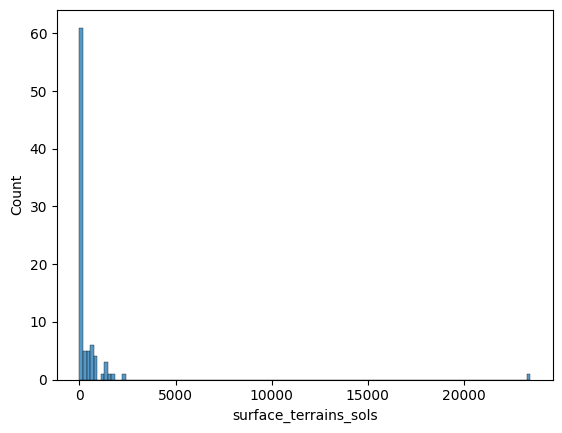

In [124]:
sns.histplot(filtered_df, x='surface_terrains_sols')

In [125]:
# Classify outdoor space sizes
bins = [-1, 0, 200, 1000, float('inf')]
labels = ['No garden', 'Small outdoor space', 'Average outdoor space', 'Large outdoor space']
filtered_df['surface_terrains_sols'] = pd.cut(filtered_df['surface_terrains_sols'], bins=bins, labels=labels)

In [126]:
filtered_df['surface_terrains_sols']

0       Large outdoor space
1                 No garden
2     Average outdoor space
3     Average outdoor space
4                 No garden
              ...          
95    Average outdoor space
96                No garden
97    Average outdoor space
98      Large outdoor space
99                No garden
Name: surface_terrains_sols, Length: 89, dtype: category
Categories (4, object): ['No garden' < 'Small outdoor space' < 'Average outdoor space' < 'Large outdoor space']

## Feature engineering unique_city_id + saving the mapping to .csv

In [127]:
filtered_df['unique_city_id'] = filtered_df.apply(lambda row: (row['departement'], row['id_ville']), axis=1)

In [128]:
# Creating a city mapping to re-use for the predictions and saving it to .csv
city_mapping = filtered_df[['unique_city_id', 'ville']].drop_duplicates()
city_mapping.to_csv('city_mapping.csv', index=False)
filtered_df = filtered_df.drop(columns = ['id_ville', 'ville'], axis= 1)

## Price/target preprocessing

In [129]:
# Feature engineering target price per m²
filtered_df['prix/m²'] = filtered_df['prix']/filtered_df['surface_habitable']
filtered_df = filtered_df.drop('prix', axis=1)

## Time features preprocessing

In [130]:
# Casting date of transaction to_datetime and creating columns for the year and month of the transaction
filtered_df['date_transaction'] = pd.to_datetime(filtered_df['date_transaction'])
filtered_df['year'] = filtered_df['date_transaction'].dt.year
filtered_df['month'] = filtered_df['date_transaction'].dt.month

In [131]:
# Numerical encoding: year * 12 + month
filtered_df['year_month_numeric'] = filtered_df['date_transaction'].dt.year * 12 + filtered_df['date_transaction'].dt.month
# Cyclic encoding for the month
filtered_df['month_sin'] = np.sin(2 * np.pi * filtered_df['month'] / 12)
filtered_df['month_cos'] = np.cos(2 * np.pi * filtered_df['month'] / 12)

# Dropping original temporal features
filtered_df_with_tfs = filtered_df.copy()
filtered_df = filtered_df.drop(columns=['date_transaction', 'year', 'month'])


In [132]:
filtered_df.head(10)

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year_month_numeric,month_sin,month_cos
0,63,Maison,4,123,Large outdoor space,"(63, 247)",1808.943089,24187,-5.000000e-01,-8.660254e-01
1,73,Appartement,1,23,No garden,"(73, 15)",9506.086957,24294,1.224647e-16,-1.000000e+00
2,77,Maison,6,124,Average outdoor space,"(77, 316)",2056.048387,24247,-5.000000e-01,-8.660254e-01
3,94,Maison,3,93,Average outdoor space,"(94, 81)",4086.021505,24274,-8.660254e-01,5.000000e-01
4,77,Maison,5,96,No garden,"(77, 284)",2687.500000,24223,-5.000000e-01,-8.660254e-01
5,83,Appartement,2,37,No garden,"(83, 137)",3810.810811,24285,-1.000000e+00,-1.836970e-16
6,63,Maison,5,84,No garden,"(63, 80)",476.071429,24238,-8.660254e-01,5.000000e-01
7,85,Maison,4,127,Average outdoor space,"(85, 49)",456.692913,24205,5.000000e-01,8.660254e-01
8,2,Maison,3,62,Small outdoor space,"(2, 64)",1072.580645,24248,-8.660254e-01,-5.000000e-01
9,972,Appartement,1,30,No garden,"(972, 29)",2300.000000,24279,1.000000e+00,6.123234e-17


## To be compared to pick a final DataFrame

In [133]:
filtered_df[filtered_df.year_month_numeric == 24187]

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year_month_numeric,month_sin,month_cos
0,63,Maison,4,123,Large outdoor space,"(63, 247)",1808.943089,24187,-0.5,-0.866025
23,81,Maison,3,48,No garden,"(81, 121)",145.833333,24187,-0.5,-0.866025
51,13,Appartement,4,81,No garden,"(13, 213)",2098.765432,24187,-0.5,-0.866025
56,73,Appartement,2,36,No garden,"(73, 318)",2916.666667,24187,-0.5,-0.866025


In [134]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   departement            89 non-null     int64   
 1   type_batiment          89 non-null     object  
 2   n_pieces               89 non-null     int64   
 3   surface_habitable      89 non-null     int64   
 4   surface_terrains_sols  89 non-null     category
 5   unique_city_id         89 non-null     object  
 6   prix/m²                89 non-null     float64 
 7   year_month_numeric     89 non-null     int32   
 8   month_sin              89 non-null     float64 
 9   month_cos              89 non-null     float64 
dtypes: category(1), float64(3), int32(1), int64(3), object(2)
memory usage: 6.9+ KB


# Time Series DataFrames to be merged

## Taux_endettement

In [135]:
taux_endettement_df = real_estate().get_data()['taux_endettement_df'].copy()
taux_endettement_df

,date,taux_endettement
0,2012,85.37
1,2013,87.56
2,2014,87.86
3,2015,89.52
4,2016,90.89
5,2017,93.33
6,2018,96.35
7,2019,98.99
8,2020,101.93
9,2021,103.04


In [136]:
taux_endettement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              11 non-null     int64  
 1   taux_endettement  11 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 304.0 bytes


In [137]:
taux_endettement_df['date'] = pd.to_datetime(taux_endettement_df['date'], format='%Y')
taux_endettement_df.set_index('date', inplace=True)
taux_endettement_mensuel_df = taux_endettement_df.resample('MS').interpolate(method='linear')

In [138]:
taux_endettement_mensuel_df.head(10)

,taux_endettement
date,
2012-01-01,85.3700
2012-02-01,85.5525
2012-03-01,85.7350
2012-04-01,85.9175
2012-05-01,86.1000
2012-06-01,86.2825
2012-07-01,86.4650
2012-08-01,86.6475
2012-09-01,86.8300


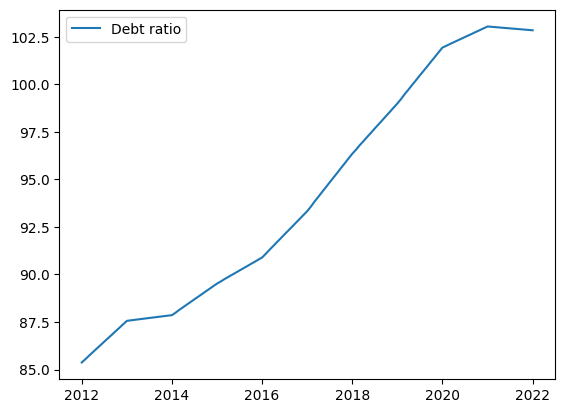

In [139]:
plt.plot(taux_endettement_mensuel_df, label='Debt ratio')
plt.legend()

## Taux_interet

In [140]:
taux_interet_df = real_estate().get_data()['taux_interet_df'].copy()
taux_interet_df

,date,taux
0,2024-07,3.64
1,2024-06,3.70
2,2024-05,3.83
3,2024-04,3.89
4,2024-03,3.94
...,...,...
111,2015-04,2.24
112,2015-03,2.34
113,2015-02,2.42
114,2015-01,2.49


In [141]:
taux_interet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    116 non-null    object 
 1   taux    116 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [142]:
taux_interet_df = taux_interet_df.set_index(taux_interet_df['date']).drop('date', axis=1)
taux_interet_df.index = pd.to_datetime(taux_interet_df.index)
taux_interet_df = taux_interet_df.sort_index(axis = 0, ascending=True)
taux_interet_df


,taux
date,
2014-12-01,2.55
2015-01-01,2.49
2015-02-01,2.42
2015-03-01,2.34
2015-04-01,2.24
...,...
2024-03-01,3.94
2024-04-01,3.89
2024-05-01,3.83


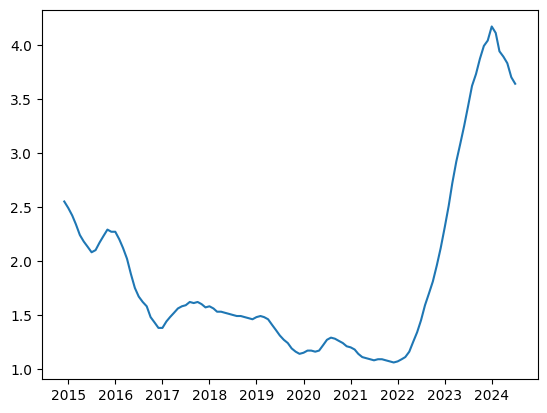

In [143]:
plt.plot(taux_interet_df)

## Indice_reference_loyers

In [144]:
Indice_reference_loyers_df = real_estate().get_data()['indice_reference_loyers_df'].copy()
Indice_reference_loyers_df.head(10)


,quarter,IRL
0,2024-04-01,145.17
1,2024-01-01,143.46
2,2023-10-01,142.06
3,2023-07-01,141.03
4,2023-04-01,140.59
5,2023-01-01,138.61
6,2022-10-01,137.26
7,2022-07-01,136.27
8,2022-04-01,135.84
9,2022-01-01,133.93


In [145]:
Indice_reference_loyers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  87 non-null     object 
 1   IRL      87 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [146]:
Indice_reference_loyers_df['quarter'] = pd.to_datetime(Indice_reference_loyers_df['quarter'])

In [147]:
Indice_reference_loyers_df = Indice_reference_loyers_df.set_index(Indice_reference_loyers_df['quarter']).drop('quarter', axis=1)

In [148]:
# Function to expand quarterly debt ratio into monthly data
def expand_quarters_to_months(df):
    monthly_data = []

    for i in range(len(df) - 1):
        # Get the current quarter and next quarter values
        start_quarter = df.index[i]
        start_value = df.iloc[i]['IRL']
        end_value = df.iloc[i + 1]['IRL']

        # Generate monthly dates within the quarter
        months = pd.date_range(start=start_quarter, periods=3, freq='MS')

        # Calculate the monthly change for the quarter
        monthly_change = (end_value - start_value) / 3
        monthly_ratios = [start_value + (monthly_change * m) for m in range(3)]

        # Append the monthly data
        monthly_data.append(pd.DataFrame({'date': months, 'IRL': monthly_ratios}).set_index('date'))

    # Concatenate all rows into a single DataFrame
    return pd.concat(monthly_data)

# Apply the function to expand the data
Indice_reference_loyers_df = expand_quarters_to_months(Indice_reference_loyers_df)


In [149]:
Indice_reference_loyers_df = Indice_reference_loyers_df.sort_index(axis=0, ascending=True)

In [150]:
Indice_reference_loyers_df

,IRL
date,
2003-01-01,106.170000
2003-02-01,105.983333
2003-03-01,105.796667
2003-04-01,106.610000
2003-05-01,106.463333
...,...
2024-02-01,142.993333
2024-03-01,142.526667
2024-04-01,145.170000


# Flux_nouveaux_emprunts

In [151]:
flux_nouveaux_emprunts_df = real_estate().get_data()['flux_nouveaux_emprunts_df'].copy()
flux_nouveaux_emprunts_df.head(5)


,date,emprunts_M€
0,2024-07,16442
1,2024-06,13017
2,2024-05,10709
3,2024-04,10817
4,2024-03,9751


In [152]:
flux_nouveaux_emprunts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         170 non-null    object
 1   emprunts_M€  170 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [153]:
flux_nouveaux_emprunts_df['emprunts_€'] = flux_nouveaux_emprunts_df['emprunts_M€'] * 1000000
flux_nouveaux_emprunts_df.drop('emprunts_M€', axis = 1, inplace=True)
flux_nouveaux_emprunts_df = flux_nouveaux_emprunts_df.set_index(flux_nouveaux_emprunts_df['date']).sort_index(axis=0, ascending=True).drop('date', axis=1)
flux_nouveaux_emprunts_df.index = pd.to_datetime(flux_nouveaux_emprunts_df.index)

In [154]:
flux_nouveaux_emprunts_df.head(5)

,emprunts_€
date,
2010-06-01,14148000000
2010-07-01,16297000000
2010-08-01,13677000000
2010-09-01,13193000000
2010-10-01,12606000000


In [155]:
# Reindex all input DataFrames to the same monthly frequency
common_index = pd.date_range(start=flux_nouveaux_emprunts_df.index[0],
                             end=flux_nouveaux_emprunts_df.index[-1],
                             freq='MS')

flux_nouveaux_emprunts_df = flux_nouveaux_emprunts_df.reindex(common_index).interpolate()
# Indice_reference_loyers_df = Indice_reference_loyers_df.reindex(common_index).interpolate()
taux_endettement_mensuel_df = taux_endettement_mensuel_df.reindex(common_index).interpolate()
taux_interet_df = taux_interet_df.reindex(common_index).interpolate()

# Combine into a single DataFrame
combined_temporal_features = pd.DataFrame({
    'New_mortgages': flux_nouveaux_emprunts_df.squeeze(),  # .squeeze() if it's a single-column DataFrame
    # 'IRL': Indice_reference_loyers_df.squeeze(),
    'Debt_ratio': taux_endettement_mensuel_df.squeeze(),
    'Interest_rates': taux_interet_df.squeeze()
}, index=common_index)

combined_temporal_features.dropna(how='any', inplace=True)

combined_temporal_features


,New_mortgages,Debt_ratio,Interest_rates
2014-12-01,13207000000,89.381667,2.55
2015-01-01,12247000000,89.520000,2.49
2015-02-01,12924000000,89.634167,2.42
2015-03-01,15864000000,89.748333,2.34
2015-04-01,16895000000,89.862500,2.24
...,...,...,...
2024-03-01,9751000000,102.840000,3.94
2024-04-01,10817000000,102.840000,3.89
2024-05-01,10709000000,102.840000,3.83
2024-06-01,13017000000,102.840000,3.70


In [156]:
combined_temporal_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2014-12-01 to 2024-07-01
Freq: MS
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   New_mortgages   116 non-null    int64  
 1   Debt_ratio      116 non-null    float64
 2   Interest_rates  116 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [157]:
combined_temporal_features['date'] = combined_temporal_features.index

In [158]:
combined_temporal_features['year_month_numeric'] = combined_temporal_features['date'].dt.year * 12 + combined_temporal_features['date'].dt.month

In [159]:
combined_temporal_features.drop('date', axis=1, inplace=True)

In [160]:
combined_temporal_features.head(10)

,New_mortgages,Debt_ratio,Interest_rates,year_month_numeric
2014-12-01,13207000000,89.381667,2.55,24180
2015-01-01,12247000000,89.520000,2.49,24181
2015-02-01,12924000000,89.634167,2.42,24182
2015-03-01,15864000000,89.748333,2.34,24183
2015-04-01,16895000000,89.862500,2.24,24184
2015-05-01,15367000000,89.976667,2.18,24185
2015-06-01,21720000000,90.090833,2.13,24186
2015-07-01,26142000000,90.205000,2.08,24187
2015-08-01,22640000000,90.319167,2.10,24188
2015-09-01,22385000000,90.433333,2.17,24189


## Dealing with Foyers_fiscaux and Loyers DataFrames

In [161]:
city_mapping

,unique_city_id,ville
0,"(63, 247)",MUROL
1,"(73, 15)",LES ALLUES
2,"(77, 316)",MORET-LOING-ET-ORVANNE
3,"(94, 81)",VITRY-SUR-SEINE
4,"(77, 284)",MEAUX
...,...,...
94,"(14, 319)",GRENTHEVILLE
95,"(21, 292)",GENLIS
96,"(69, 386)",LYON 6EME
97,"(56, 121)",LORIENT


### Foyers_fiscaux

In [162]:
foyers_fiscaux_df = real_estate().get_data()['foyers_fiscaux_df'].copy()[['date', 'departement', 'ville', 'n_foyers_fiscaux', 'revenu_fiscal_moyen']]
foyers_fiscaux_df.head(5)

,date,departement,ville,n_foyers_fiscaux,revenu_fiscal_moyen
0,2022,01,L'Abergement-Clémenciat,466.0,35291.10
1,2022,01,L'Abergement-de-Varey,143.0,34788.93
2,2022,01,Ambérieu-en-Bugey,9276.0,26612.43
3,2022,01,Ambérieux-en-Dombes,1073.0,34712.21
4,2022,01,Ambléon,78.0,26655.58


In [163]:
pd.DataFrame(foyers_fiscaux_df.value_counts(normalize=True))

proportion
date departement ville                 n_foyers_fiscaux revenu_fiscal_moyen            
2022 976         Tsingoni              3776.0           16478.57               0.000003
                 Acoua                 1776.0           16524.68               0.000003
     974         Salazie               4470.0           12433.39               0.000003
                 Sainte-Suzanne        14698.0          19603.44               0.000003
                 Sainte-Rose           4108.0           14076.02               0.000003
...                                                                                 ...
2014 01          AMBLEON               61.0             29484.75               0.000003
                 AMBERIEUX EN DOMBES   837.0            29031.10               0.000003
                 AMBERIEU EN BUGEY     7819.0           23707.36               0.000003
                 AMAREINS FRANCHELEINS 719.0            29523.13               0.000003
                 ABERGEMENT DE VAREY   121.0            29054.87               0.000003

[314721 rows x 1 columns]

In [164]:
foyers_fiscaux_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315542 entries, 0 to 315541
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 315542 non-null  int64  
 1   departement          315542 non-null  object 
 2   ville                315542 non-null  object 
 3   n_foyers_fiscaux     315058 non-null  float64
 4   revenu_fiscal_moyen  314721 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.0+ MB


In [165]:
foyers_fiscaux_df['ville'] = foyers_fiscaux_df['ville'].apply(lambda row: row.upper())

In [166]:
foyers_fiscaux_merged = pd.merge(left=foyers_fiscaux_df, right=city_mapping, on='ville')
foyers_fiscaux_merged.drop(columns=['departement', 'ville'], axis =1, inplace=True)
foyers_fiscaux_merged['date'] = pd.to_datetime(foyers_fiscaux_merged['date'], format='%Y')

In [167]:
foyers_fiscaux_merged

,date,n_foyers_fiscaux,revenu_fiscal_moyen,unique_city_id
0,2022-01-01,4380.0,29342.47,"(1, 202)"
1,2022-01-01,2170.0,22774.37,"(2, 64)"
2,2022-01-01,18185.0,22658.72,"(3, 310)"
3,2022-01-01,745.0,32288.22,"(69, 290)"
4,2022-01-01,616.0,30269.67,"(10, 51)"
...,...,...,...,...
544,2014-01-01,2792.0,27536.56,"(91, 207)"
545,2014-01-01,7271.0,31235.37,"(91, 432)"
546,2014-01-01,50067.0,39903.82,"(92, 26)"
547,2014-01-01,1351.0,50119.42,"(95, 426)"


In [168]:
ff_grouped = foyers_fiscaux_merged.groupby(['date', 'unique_city_id']).mean()
ff_grouped

n_foyers_fiscaux  revenu_fiscal_moyen
date       unique_city_id                                       
2014-01-01 (1, 202)                  3915.0            25304.160
           (2, 64)                   2159.0            21115.750
           (3, 310)                 17549.0            20174.270
           (10, 51)                   322.0            32954.615
           (13, 56)                 28202.0            24123.760
...                                     ...                  ...
2022-01-01 (92, 35)                 17592.0            51216.600
           (94, 52)                 19566.0            53280.520
           (94, 81)                 57101.0            23106.410
           (95, 52)                  5858.0            25313.130
           (95, 426)                 1507.0            57010.050

[481 rows x 2 columns]

In [169]:
# Numerical encoding: year * 12 + month
foyers_fiscaux_merged['year_month_numeric'] = foyers_fiscaux_merged['date'].dt.year * 12 + foyers_fiscaux_merged['date'].dt.month
foyers_fiscaux_merged.drop('date', axis=1, inplace=True)

foyers_fiscaux_merged.head(10)

,n_foyers_fiscaux,revenu_fiscal_moyen,unique_city_id,year_month_numeric
0,4380.0,29342.47,"(1, 202)",24265
1,2170.0,22774.37,"(2, 64)",24265
2,18185.0,22658.72,"(3, 310)",24265
3,745.0,32288.22,"(69, 290)",24265
4,616.0,30269.67,"(10, 51)",24265
5,30743.0,26863.63,"(13, 56)",24265
6,531.0,33381.23,"(14, 319)",24265
7,808.0,40463.09,"(21, 273)",24265
8,3038.0,25765.16,"(21, 292)",24265
9,29451.0,23439.40,"(22, 278)",24265


### Loyers

In [170]:
loyers_df = real_estate().get_data()['loyers_df'].copy()
loyers_df.head(5)

,departement,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison
0,1,1,L'Abergement-Clémenciat,2018,9.372335,8.191701
1,1,2,L'Abergement-de-Varey,2018,8.635552,7.441199
2,1,4,Ambérieu-en-Bugey,2018,10.074507,8.411184
3,1,5,Ambérieux-en-Dombes,2018,9.372335,9.039551
4,1,6,Ambléon,2018,8.966955,8.058265


In [171]:
loyers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105391 entries, 0 to 105390
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   departement           105391 non-null  object 
 1   id_ville              105391 non-null  int64  
 2   ville                 105391 non-null  object 
 3   date                  105391 non-null  int64  
 4   loyer_m2_appartement  105391 non-null  float64
 5   loyer_m2_maison       105391 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ MB


In [172]:
loyers_df['ville'] = loyers_df['ville'].apply(lambda row: row.upper())

In [173]:
loyers_merged = pd.merge(left=loyers_df, right=city_mapping, on='ville')
loyers_merged.drop(columns=['departement', 'id_ville', 'ville'], axis =1, inplace=True)
loyers_merged['date'] = pd.to_datetime(loyers_merged['date'], format='%Y')

# Numerical encoding: year * 12 + month
loyers_merged['year_month_numeric'] = loyers_merged['date'].dt.year * 12 + loyers_merged['date'].dt.month
loyers_merged.drop('date', axis=1, inplace=True)

loyers_merged.head(5)

,loyer_m2_appartement,loyer_m2_maison,unique_city_id,year_month_numeric
0,9.941381,8.422263,"(1, 202)",24217
1,9.200762,6.979486,"(10, 51)",24217
2,13.424987,13.008365,"(13, 56)",24217
3,10.329975,8.489931,"(14, 319)",24217
4,9.689064,8.085671,"(2, 64)",24217


In [174]:
loyers_merged.groupby(['unique_city_id', 'year_month_numeric']).mean().unstack()

loyer_m2_appartement                       loyer_m2_maison  \
year_month_numeric                24217      24265      24277           24217   
unique_city_id                                                                  
(1, 202)                       9.941381  10.532299  11.141950        8.422263   
(2, 64)                        9.689064   9.831469   9.272180        8.085671   
(3, 310)                       8.833184   9.933213  10.317476        7.882728   
(10, 51)                       9.205546   8.613312   9.533306        8.033280   
(13, 56)                      13.424987  14.096821  14.754604       13.008365   
(14, 319)                     10.329975  10.984165  11.415592        8.489931   
(21, 273)                      8.966692  10.078626  11.223497        8.324319   
(21, 292)                     10.153742  10.815241  11.134850        8.708100   
(22, 278)                      8.687295   9.820909  11.554960        7.331210   
(28, 232)                      7.658574   7.911962   7.789172        6.804824   
(29, 39)                      10.269851  11.323702  13.683216        8.149332   
(30, 211)                     11.173957  11.688977  10.672527        9.215785   
(31, 157)                     11.580843  11.693778  11.956544       10.050807   
(31, 555)                     12.232597  13.476838  13.540648       11.225284   
(33, 51)                      11.671570  12.443085  12.941845       10.564847   
(33, 535)                     11.960797  12.244221  12.060249       10.114467   
(33, 545)                      9.453186  10.717777  10.740713        7.447288   
(35, 216)                      9.817671  10.708948  11.427196        8.138868   
(35, 238)                     11.798332  13.397531  13.972929       10.806890   
(38, 276)                     11.393607  11.346032  11.695645        9.392621   
(38, 344)                      9.962578  10.921197  11.366273        8.844160   
(44, 55)                      12.436882  14.501433  15.589031       11.113444   
(44, 66)                            NaN        NaN  11.250038             NaN   
(44, 109)                     12.301945  13.519203  14.019438       11.597231   
(44, 131)                     11.984394  12.521112  13.473645        9.708128   
(45, 108)                      8.205749   8.305821   8.133320        6.616825   
(54, 582)                     10.302555  11.998780  10.733125        9.144740   
(56, 121)                      9.923050  11.475213  12.174445        8.785645   
(59, 350)                     13.857356  14.663729  15.019655       11.061963   
(59, 360)                     12.718142  13.167243  13.465724        9.480893   
(63, 80)                       8.680078   9.055560   8.165545        6.541050   
(63, 247)                      7.533304   7.989073  10.049769        6.164220   
(69, 204)                     12.378978  13.092017  13.877522       12.001263   
(69, 290)                      9.306634   9.351732  10.397058        8.153408   
(72, 189)                      7.658574   6.693434   8.931306        5.775664   
(73, 15)                       9.447071  10.216169  11.639695       11.111213   
(73, 318)                     10.868302  11.555513  10.416461        8.553565   
(74, 134)                     17.541288  14.614734  15.938512       11.134855   
(74, 225)                     10.522234  11.734075  11.857344        9.162438   
(76, 474)                     11.277135  11.670458  12.056503        8.476620   
(77, 30)                      10.394726   9.302762  10.758099        8.731128   
(77, 284)                     14.648803  15.165269  15.565320       11.374169   
(77, 316)                     13.857943  13.144379  14.486235       10.771312   
(78, 551)                     21.256146  22.271296  22.738634       19.317288   
(78, 646)                     21.392218  21.693460  22.116789       21.681572   
(79, 191)                      9.376300  10.235160  12.500778        7.523656   
(80, 21)                      12.070237  13.567902

# Merging DataFrames

In [175]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   departement            89 non-null     int64   
 1   type_batiment          89 non-null     object  
 2   n_pieces               89 non-null     int64   
 3   surface_habitable      89 non-null     int64   
 4   surface_terrains_sols  89 non-null     category
 5   unique_city_id         89 non-null     object  
 6   prix/m²                89 non-null     float64 
 7   year_month_numeric     89 non-null     int32   
 8   month_sin              89 non-null     float64 
 9   month_cos              89 non-null     float64 
dtypes: category(1), float64(3), int32(1), int64(3), object(2)
memory usage: 6.9+ KB


In [176]:
filtered_df.head(10)

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year_month_numeric,month_sin,month_cos
0,63,Maison,4,123,Large outdoor space,"(63, 247)",1808.943089,24187,-5.000000e-01,-8.660254e-01
1,73,Appartement,1,23,No garden,"(73, 15)",9506.086957,24294,1.224647e-16,-1.000000e+00
2,77,Maison,6,124,Average outdoor space,"(77, 316)",2056.048387,24247,-5.000000e-01,-8.660254e-01
3,94,Maison,3,93,Average outdoor space,"(94, 81)",4086.021505,24274,-8.660254e-01,5.000000e-01
4,77,Maison,5,96,No garden,"(77, 284)",2687.500000,24223,-5.000000e-01,-8.660254e-01
5,83,Appartement,2,37,No garden,"(83, 137)",3810.810811,24285,-1.000000e+00,-1.836970e-16
6,63,Maison,5,84,No garden,"(63, 80)",476.071429,24238,-8.660254e-01,5.000000e-01
7,85,Maison,4,127,Average outdoor space,"(85, 49)",456.692913,24205,5.000000e-01,8.660254e-01
8,2,Maison,3,62,Small outdoor space,"(2, 64)",1072.580645,24248,-8.660254e-01,-5.000000e-01
9,972,Appartement,1,30,No garden,"(972, 29)",2300.000000,24279,1.000000e+00,6.123234e-17


In [177]:
foyers_fiscaux_merged = foyers_fiscaux_merged.groupby(['unique_city_id']).agg({
    'n_foyers_fiscaux': 'mean',
    'revenu_fiscal_moyen': 'mean'
}).reset_index()


In [178]:
foyers_fiscaux_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_city_id       67 non-null     object 
 1   n_foyers_fiscaux     67 non-null     float64
 2   revenu_fiscal_moyen  67 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [198]:
foyers_fiscaux_merged.head()

,unique_city_id,n_foyers_fiscaux,revenu_fiscal_moyen
0,"(1, 202)",4130.555556,27104.757778
1,"(2, 64)",2188.888889,21168.797778
2,"(3, 310)",17815.777778,20923.501111
3,"(10, 51)",349.111111,34250.210000
4,"(13, 56)",29474.000000,24868.594444


In [180]:
combined_temporal_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2014-12-01 to 2024-07-01
Freq: MS
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   New_mortgages       116 non-null    int64  
 1   Debt_ratio          116 non-null    float64
 2   Interest_rates      116 non-null    float64
 3   year_month_numeric  116 non-null    int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 4.1 KB


In [181]:
combined_temporal_features.head(10)

,New_mortgages,Debt_ratio,Interest_rates,year_month_numeric
2014-12-01,13207000000,89.381667,2.55,24180
2015-01-01,12247000000,89.520000,2.49,24181
2015-02-01,12924000000,89.634167,2.42,24182
2015-03-01,15864000000,89.748333,2.34,24183
2015-04-01,16895000000,89.862500,2.24,24184
2015-05-01,15367000000,89.976667,2.18,24185
2015-06-01,21720000000,90.090833,2.13,24186
2015-07-01,26142000000,90.205000,2.08,24187
2015-08-01,22640000000,90.319167,2.10,24188
2015-09-01,22385000000,90.433333,2.17,24189


In [182]:
filtered_df

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year_month_numeric,month_sin,month_cos
0,63,Maison,4,123,Large outdoor space,"(63, 247)",1808.943089,24187,-5.000000e-01,-8.660254e-01
1,73,Appartement,1,23,No garden,"(73, 15)",9506.086957,24294,1.224647e-16,-1.000000e+00
2,77,Maison,6,124,Average outdoor space,"(77, 316)",2056.048387,24247,-5.000000e-01,-8.660254e-01
3,94,Maison,3,93,Average outdoor space,"(94, 81)",4086.021505,24274,-8.660254e-01,5.000000e-01
4,77,Maison,5,96,No garden,"(77, 284)",2687.500000,24223,-5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...
95,21,Maison,4,79,Average outdoor space,"(21, 292)",1924.050633,24275,-5.000000e-01,8.660254e-01
96,69,Appartement,2,43,No garden,"(69, 386)",6744.186047,24283,-5.000000e-01,-8.660254e-01
97,56,Maison,4,65,Average outdoor space,"(56, 121)",2769.230769,24277,5.000000e-01,8.660254e-01
98,38,Maison,8,185,Large outdoor space,"(38, 276)",1924.864865,24207,1.000000e+00,6.123234e-17


In [329]:
main_test = filtered_df.merge(combined_temporal_features, how='inner', on='year_month_numeric', copy=True)

In [330]:
main_test.head(10)

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year_month_numeric,month_sin,month_cos,New_mortgages,Debt_ratio,Interest_rates
0,63,Maison,4,123,Large outdoor space,"(63, 247)",1808.943089,24187,-5.000000e-01,-8.660254e-01,26142000000,90.2050,2.08
1,73,Appartement,1,23,No garden,"(73, 15)",9506.086957,24294,1.224647e-16,-1.000000e+00,13017000000,102.8400,3.70
2,77,Maison,6,124,Average outdoor space,"(77, 316)",2056.048387,24247,-5.000000e-01,-8.660254e-01,23378000000,102.4850,1.27
3,94,Maison,3,93,Average outdoor space,"(94, 81)",4086.021505,24274,-8.660254e-01,5.000000e-01,18201000000,102.8400,1.81
4,77,Maison,5,96,No garden,"(77, 284)",2687.500000,24223,-5.000000e-01,-8.660254e-01,22982000000,97.6700,1.50
5,83,Appartement,2,37,No garden,"(83, 137)",3810.810811,24285,-1.000000e+00,-1.836970e-16,11439000000,102.8400,3.73
6,63,Maison,5,84,No garden,"(63, 80)",476.071429,24238,-8.660254e-01,5.000000e-01,25462000000,101.1950,1.19
7,85,Maison,4,127,Average outdoor space,"(85, 49)",456.692913,24205,5.000000e-01,8.660254e-01,39062000000,93.3300,1.38
8,2,Maison,3,62,Small outdoor space,"(2, 64)",1072.580645,24248,-8.660254e-01,-5.000000e-01,21034000000,102.5775,1.29
9,972,Appartement,1,30,No garden,"(972, 29)",2300.000000,24279,1.000000e+00,6.123234e-17,15818000000,102.8400,2.72


In [331]:
foyers_fiscaux_merged[foyers_fiscaux_merged['unique_city_id'] == (10, 51)]


,unique_city_id,n_foyers_fiscaux,revenu_fiscal_moyen
3,"(10, 51)",349.111111,34250.21


In [332]:
merged_df = main_test.merge(
    foyers_fiscaux_merged,
    on='unique_city_id',
    how='inner'  # or 'inner' depending on your preference
)


In [333]:
merged_df.isna().sum()

departement              0
type_batiment            0
n_pieces                 0
surface_habitable        0
surface_terrains_sols    0
unique_city_id           0
prix/m²                  0
year_month_numeric       0
month_sin                0
month_cos                0
New_mortgages            0
Debt_ratio               0
Interest_rates           0
n_foyers_fiscaux         0
revenu_fiscal_moyen      0
dtype: int64

In [334]:
merged_df

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year_month_numeric,month_sin,month_cos,New_mortgages,Debt_ratio,Interest_rates,n_foyers_fiscaux,revenu_fiscal_moyen
0,63,Maison,4,123,Large outdoor space,"(63, 247)",1808.943089,24187,-5.000000e-01,-8.660254e-01,26142000000,90.205000,2.08,382.777778,22573.926667
1,73,Appartement,1,23,No garden,"(73, 15)",9506.086957,24294,1.224647e-16,-1.000000e+00,13017000000,102.840000,3.70,1164.000000,35757.748889
2,77,Maison,6,124,Average outdoor space,"(77, 316)",2056.048387,24247,-5.000000e-01,-8.660254e-01,23378000000,102.485000,1.27,7322.666667,33184.336667
3,94,Maison,3,93,Average outdoor space,"(94, 81)",4086.021505,24274,-8.660254e-01,5.000000e-01,18201000000,102.840000,1.81,55161.000000,21823.328333
4,77,Maison,5,96,No garden,"(77, 284)",2687.500000,24223,-5.000000e-01,-8.660254e-01,22982000000,97.670000,1.50,32539.777778,21260.924444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,14,Maison,2,42,No garden,"(14, 319)",5000.000000,24278,8.660254e-01,5.000000e-01,13981000000,102.840000,2.51,476.000000,29936.623333
65,21,Maison,4,79,Average outdoor space,"(21, 292)",1924.050633,24275,-5.000000e-01,8.660254e-01,17968000000,102.840000,1.96,3009.333333,23422.250000
66,56,Maison,4,65,Average outdoor space,"(56, 121)",2769.230769,24277,5.000000e-01,8.660254e-01,15708000000,102.840000,2.31,36619.666667,21363.253333
67,38,Maison,8,185,Large outdoor space,"(38, 276)",1924.864865,24207,1.000000e+00,6.123234e-17,34221000000,93.833333,1.48,1502.000000,28255.390000


## Features analysis

In [335]:
taux_interet_df

,taux
2010-06-01,NaN
2010-07-01,NaN
2010-08-01,NaN
2010-09-01,NaN
2010-10-01,NaN
...,...
2024-03-01,3.94
2024-04-01,3.89
2024-05-01,3.83
2024-06-01,3.70


In [336]:
app_prices = filtered_df_with_tfs[filtered_df_with_tfs['type_batiment'] == 'Appartement'].copy()
app_prices.set_index('date_transaction', drop=True, inplace=True)
app_prices.sort_index(ascending=True, inplace=True)
app_prices.head(3)

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year,month,year_month_numeric,month_sin,month_cos
date_transaction,,,,,,,,,,,,
2015-07-03,73,Appartement,2,36,No garden,"(73, 318)",2916.666667,2015,7,24187,-0.5,-0.866025
2015-07-29,13,Appartement,4,81,No garden,"(13, 213)",2098.765432,2015,7,24187,-0.5,-0.866025
2015-11-05,78,Appartement,3,80,No garden,"(78, 551)",6696.250000,2015,11,24191,-0.5,0.866025


In [337]:
house_prices = filtered_df_with_tfs[filtered_df_with_tfs['type_batiment'] == 'Maison'].copy()
house_prices.set_index('date_transaction', drop=True, inplace=True)
house_prices.sort_index(ascending=True, inplace=True)
house_prices.head(3)

,departement,type_batiment,n_pieces,surface_habitable,surface_terrains_sols,unique_city_id,prix/m²,year,month,year_month_numeric,month_sin,month_cos
date_transaction,,,,,,,,,,,,
2014-02-28,3,Maison,7,174,Small outdoor space,"(3, 310)",1390.143678,2014,2,24170,0.866025,5.000000e-01
2014-03-31,33,Maison,4,75,Large outdoor space,"(33, 545)",1733.333333,2014,3,24171,1.000000,6.123234e-17
2015-02-27,83,Maison,4,93,Small outdoor space,"(83, 137)",2440.860215,2015,2,24182,0.866025,5.000000e-01


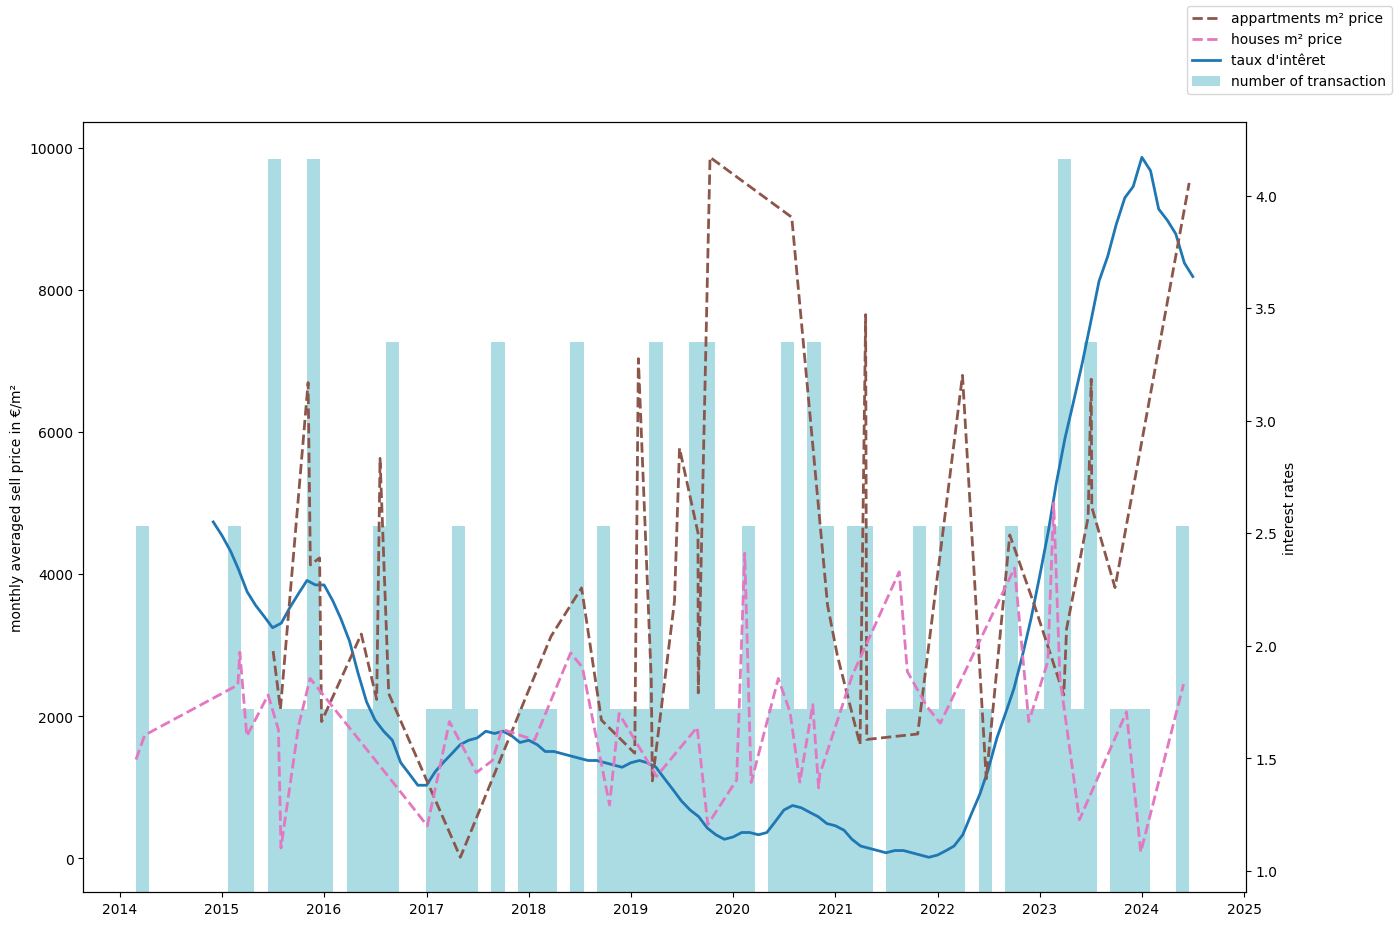

In [338]:
import matplotlib.dates as mdates

rate_dates = mdates.date2num(taux_interet_df.index)
transaction_dates = mdates.date2num(transactions_sample_df["date_transaction"])
f, ax1 = plt.subplots(figsize=[15, 10])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.hist(transaction_dates, bins=80, color="#abdbe3", label="number of transaction")
ax2.plot(rate_dates, taux_interet_df['taux'], lw=2., label="taux d'intêret")
ax1.plot(mdates.date2num(app_prices.index), app_prices['prix/m²'], label="appartments m² price", linestyle="--", lw=2., color="C5")
ax1.plot(mdates.date2num(house_prices.index), house_prices['prix/m²'], label="houses m² price", linestyle="--", lw=2., color="C6")
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.set_yticks([])
ax2.set_ylabel("interest rates")
ax1.set_ylabel("monthly averaged sell price in €/m²")
ax3.spines.right.set_position(("axes", 1.))
ax2.set_zorder(ax3.get_zorder()+1)
ax1.set_zorder(max(ax2.get_zorder(), ax3.get_zorder())+1)
ax1.set_frame_on(False)
_ = f.legend()

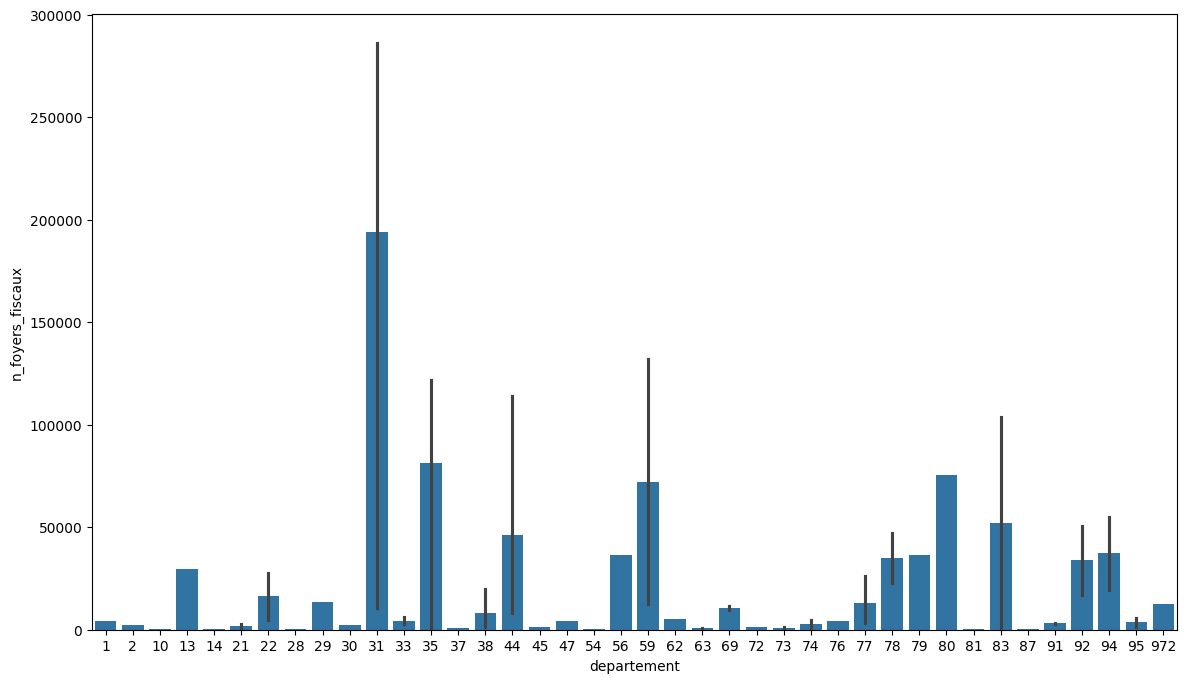

In [339]:
plt.figure(figsize = (14, 8))
sns.barplot(data=merged_df, x='departement', y='n_foyers_fiscaux');

In [340]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   departement            69 non-null     int64   
 1   type_batiment          69 non-null     object  
 2   n_pieces               69 non-null     int64   
 3   surface_habitable      69 non-null     int64   
 4   surface_terrains_sols  69 non-null     category
 5   unique_city_id         69 non-null     object  
 6   prix/m²                69 non-null     float64 
 7   year_month_numeric     69 non-null     int32   
 8   month_sin              69 non-null     float64 
 9   month_cos              69 non-null     float64 
 10  New_mortgages          69 non-null     int64   
 11  Debt_ratio             69 non-null     float64 
 12  Interest_rates         69 non-null     float64 
 13  n_foyers_fiscaux       69 non-null     float64 
 14  revenu_fiscal_moyen    69 non-null     float

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

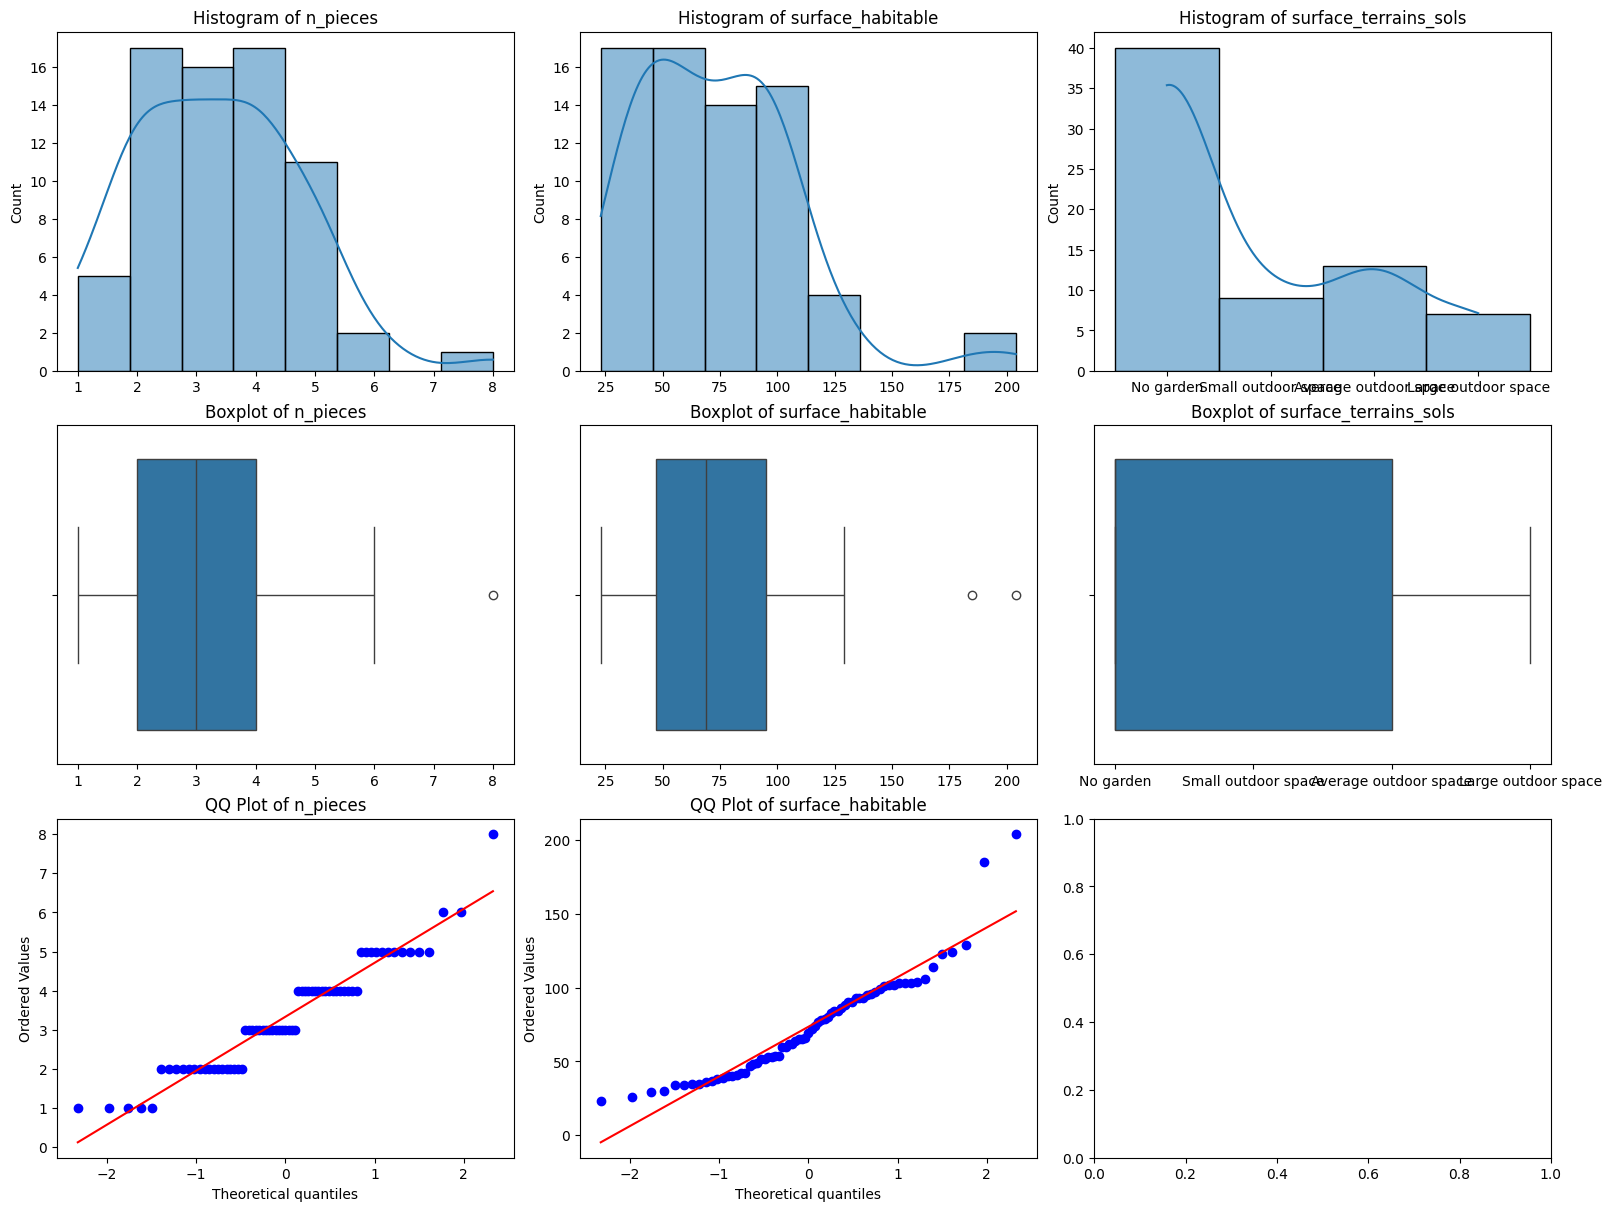

In [341]:
import scipy.stats as stats

# Define the columns to plot
columns_to_plot = ['n_pieces', 'surface_habitable', 'surface_terrains_sols']

df = merged_df

# Create the 3x4 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12), constrained_layout=True)

# Plot each type of plot for each column
for col_idx, col in enumerate(columns_to_plot):
    # Row 1: Histogram
    sns.histplot(df[col], kde=True, ax=axes[0, col_idx])
    axes[0, col_idx].set_title(f"Histogram of {col}")
    axes[0, col_idx].set_xlabel("")

    # Row 2: Boxplot
    sns.boxplot(x=df[col], ax=axes[1, col_idx])
    axes[1, col_idx].set_title(f"Boxplot of {col}")
    axes[1, col_idx].set_xlabel("")

    # Row 3: QQ plot
    stats.probplot(df[col], dist="norm", plot=axes[2, col_idx])
    axes[2, col_idx].set_title(f"QQ Plot of {col}")
    axes[2, col_idx].get_lines()[1].set_color("red")  # Make the QQ line red for better visibility

# Set overall titles
for ax_row, title in zip(axes, ["Histograms", "Boxplots", "QQ Plots"]):
    ax_row[0].set_ylabel(title, fontsize=12)

# Display the plots
plt.show()


## Baseline model

In [ ]:
merged_df.head(3)

In [ ]:
X = merged_df.drop('prix/m²', axis=1)
y = merged_df['prix/m²']

In [ ]:
# Calculate the split index
split_index = int(len(merged_df) * 0.8)  # 80% train, 20% test

# Perform the split
train_data = merged_df.iloc[:split_index]
test_data = merged_df.iloc[split_index:]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Example: Splitting with TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(merged_df):
    train_data, test_data = merged_df.iloc[train_index], merged_df.iloc[test_index]
    print("Train indices:", train_index)
    print("Test indices:", test_index)


In [ ]:
X_train = train_data.drop('prix/m²', axis=1)
y_train = train_data['prix/m²']
X_yest = test_data.drop('prix/m²', axis=1)
y_test = test_data['prix/m²']

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

dummy_reg = DummyRegressor(strategy='mean')

cv_score = cross_validate(dummy_reg, X_train, y_train, cv=5)['test_score'].mean()
cv_score

In [ ]:
!pwd

In [351]:
from real_estate.encoders import merged_dfs

merged_dfs(filtered_df, combined_temporal_features, foyers_fiscaux_merged)

,departement,property type,n_rooms,living_area,outdoor_area,unique_city_id,price/m²,year_month_numeric,month_sin,month_cos,new_mortages,debt_ratio,interest_rates,n_tax_households,average_tax_income/city
0,63,Maison,4,123,Large outdoor space,"(63, 247)",1808.943089,24187,-5.000000e-01,-8.660254e-01,26142000000,90.205000,2.08,382.777778,22573.926667
1,73,Appartement,1,23,No garden,"(73, 15)",9506.086957,24294,1.224647e-16,-1.000000e+00,13017000000,102.840000,3.70,1164.000000,35757.748889
2,77,Maison,6,124,Average outdoor space,"(77, 316)",2056.048387,24247,-5.000000e-01,-8.660254e-01,23378000000,102.485000,1.27,7322.666667,33184.336667
3,94,Maison,3,93,Average outdoor space,"(94, 81)",4086.021505,24274,-8.660254e-01,5.000000e-01,18201000000,102.840000,1.81,55161.000000,21823.328333
4,77,Maison,5,96,No garden,"(77, 284)",2687.500000,24223,-5.000000e-01,-8.660254e-01,22982000000,97.670000,1.50,32539.777778,21260.924444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,14,Maison,2,42,No garden,"(14, 319)",5000.000000,24278,8.660254e-01,5.000000e-01,13981000000,102.840000,2.51,476.000000,29936.623333
65,21,Maison,4,79,Average outdoor space,"(21, 292)",1924.050633,24275,-5.000000e-01,8.660254e-01,17968000000,102.840000,1.96,3009.333333,23422.250000
66,56,Maison,4,65,Average outdoor space,"(56, 121)",2769.230769,24277,5.000000e-01,8.660254e-01,15708000000,102.840000,2.31,36619.666667,21363.253333
67,38,Maison,8,185,Large outdoor space,"(38, 276)",1924.864865,24207,1.000000e+00,6.123234e-17,34221000000,93.833333,1.48,1502.000000,28255.390000


In [361]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from real_estate.encoders import *
from real_estate.preprocessor import *


In [445]:
transactions_sample_df_test = real_estate().get_data()['transactions_sample_df'].copy()

In [462]:
clean = clean_transactions(transactions_sample_df_test)

In [463]:
clean

,date_transaction,prix,departement,id_ville,ville,type_batiment,n_pieces,surface_habitable,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols
0,2015-07-22,222500.0,63,247,MUROL,Maison,4,123,{},{},2387
1,2024-06-18,218640.0,73,15,LES ALLUES,Appartement,1,23,{},{},
2,2020-07-23,254950.0,77,316,MORET-LOING-ET-ORVANNE,Maison,6,124,{},{},815
3,2022-10-03,380000.0,94,81,VITRY-SUR-SEINE,Maison,3,93,{},{},208
4,2018-07-12,258000.0,77,284,MEAUX,Maison,5,96,{},{},
...,...,...,...,...,...,...,...,...,...,...,...
95,2022-11-23,152000.0,21,292,GENLIS,Maison,4,79,{},{},650
96,2023-07-04,290000.0,69,386,LYON 6EME,Appartement,2,43,{},{},
97,2023-01-30,180000.0,56,121,LORIENT,Maison,4,65,{},{},227
98,2017-03-24,356100.0,38,276,NIVOLAS-VERMELLE,Maison,8,185,{},{},1401


In [457]:
preproc_clean = preprocess_features(clean)


Preprocessing features...
✅ X_processed, with shape (88, 12)


In [458]:
preproc_clean[0]

array([0.42857142857142855, 24187.0, -0.4999999999999997,
       -0.8660254037844388, 63, (63, 247), 0.0, 1.0, 0.0, 0.0, 1.0,
       1808.9430894308944], dtype=object)

TypeError: 'value' must be an instance of str or bytes, not a int

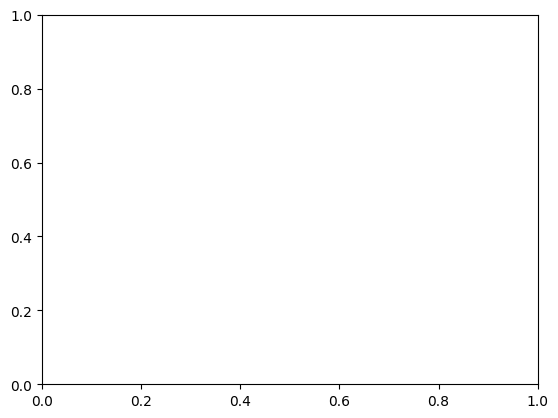

In [461]:
sns.histplot(data=clean, x='surface_terrains_sols')